In [1]:
import pandas as pd
import numpy as np
!pip install xlrd
df=pd.read_excel('IrisData.xlsx')
df.head()

     |████████████████████████████████| 112kB 19.9MB/s eta 0:00:01


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,NaN
2,4.9,3.0,1.4,0.2,Iris-setosa
3,NaN,NaN,NaN,NaN,NaN
4,4.7,3.2,1.3,0.2,Iris-setosa


## Drop non required columns

In [3]:
df.dropna(subset=['SEPAL_LENGTH'],axis=0,inplace=True)

In [4]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
4,4.7,3.2,1.3,0.2,Iris-setosa
6,4.6,3.1,1.5,0.2,Iris-setosa
8,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Selection

In [10]:
X=df[['SEPAL_LENGTH','SEPAL_WIDTH','PETAL_LENGTH','PETAL_WIDTH']].values

## Algorithm - KMeans Clustering

In [11]:
from sklearn.cluster import KMeans
arr=[]

In [12]:
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    km.fit(X)
    arr.append(km.inertia_)

## Data Visualization

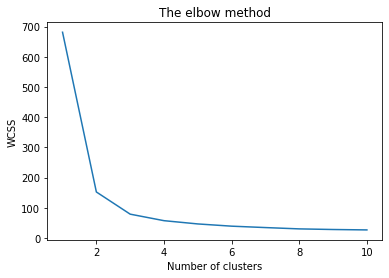

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 11), arr)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [19]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10)
y=km.fit(X)
y=km.labels_

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

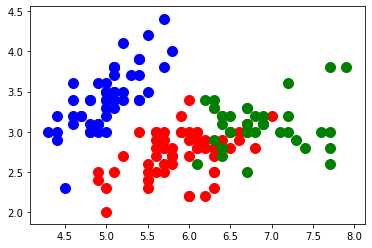

In [17]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')